<a href="https://colab.research.google.com/github/tanigawa-kou/DeepLeraning2022Late/blob/main/CNN%2BTrain_example2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN(畳み込みを含むニューラルネットワーク)でモデルに学習させる (=訓練)


## 学習モデルのライブラリをimport

In [1]:
from keras.models import Sequential, Model # 学習モデルのクラス
from keras.layers import Conv2D # 畳み込み層のクラス
from keras.layers import Flatten # 全結合層のクラス
from keras.layers import Dense # （分類出力用の）普通のニューロン層

## keras自身もimport

In [2]:
import keras

### SVG画像表示用のライブラリをimport

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

## その他のライブラリをimport

In [4]:
# 乱数を作るためにNumpyをimport
import numpy as np # importして、npという別名を設定
# 早期終了(Earl Stopping)のためのライブラリをimport
import keras.callbacks as callbacks # callbacksという別名を設定

### Numpyで乱数を作り、ダミーデータとして学習用、検証用にする

In [5]:
# 学習用データを x_train として作る
x_train = np.random.random((100, 6, 6, 1))
# 学習用データの正解を y_train として作る
y_train = keras.utils.to_categorical(np.random.randint(10,size=(100,1)),
                                     num_classes=10)
# テスト検証用データを x_test として作る
# (6,6,1)の形を今度は20セット分
x_test = np.random.random((20,6,6,1))
# テスト検証用データの正解を y_test として作る
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20,1)),
                                    num_classes=10)

## 学習モデルを生成する


In [6]:
model = Sequential()

##ニューロン層を追加する

In [7]:
#畳み込み層を追加
model.add(Conv2D(
    filters=3, #3パターンのフィルター
    kernel_initializer='lecun_uniform',
    kernel_size=(3,3), #受容野縦3横3
    input_shape=(6,6,1), #入力画像1つ縦6横6
    name='Conv2D_1'
))

##そのほかの層も追加する

In [8]:
#全結合層
model.add(Flatten(name='Flatten_1'))
#softomaxで分類するニューロン層
model.add(Dense(units=10, activation='softmax', name='Dense_1'))

###組み立てた学習モデルの構成をSVGで表示

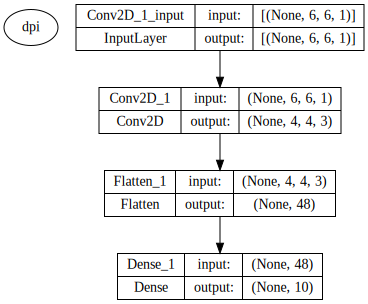

In [9]:
SVG( model_to_dot(model,
                 show_shapes=True,
                 dpi=None).create(prog='dot', format='svg'))

##組み立てモデルを学習データで訓練する
###早期終了も設定

In [10]:
#早期終了用の設定のオブジェクトを用意する
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', #損失を監視
                                        patience=5 ) #epoch5つ分様子を見る

###学習方法を指定して楽手モデルをコンパイルする

In [13]:
model.compile(loss='mean_squared_error', #損失を 平均(mean)二乗(Suqared)誤差(Error)で計算
              optimizer='sgd' #パラメータの重みをSDGで最適化する
              #SDG = 確率的勾配降下法
              )

###学習方法を指定したモデルを訓練する

In [14]:
model.fit(
    x_train, y_train, #学習データと答えのデータ
    batch_size=32, #32個ずつまとめて学習(=バッチ学習)してから重みを調整する
    epochs=10, #バッチが終わったら重みを調整して学習しなおす、その回数
    callbacks=[earlyStopping], #エポックの中で呼ぶcallback処理のリストに早期終了を追加
    validation_split=0.2 #学習データのうち2割を、学習中の自己評価検証に使う
)

Epoch 1/10
3/3 [==============================] - 1s 102ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 2/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 3/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 4/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 6/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 7/10
3/3 [==============================] - 0s 34ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 8/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 9/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 10/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0913 - val_loss: 0.0903
